<a href="https://colab.research.google.com/github/Jaimemorillo/ShouldIwatchThisMovie/blob/master/experiments/Memoria_experiment_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/charlesmalafosse/open-dataset-for-sentiment-analysis/blob/master/betsentiment-ES-tweets-sentiment-teams.zip



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp /content/gdrive/MyDrive/methods.py .

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("notebook")
import re

import methods as f

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/TFG/IMDB Dataset.csv')
df['review'] = df['review'].apply(lambda x: x.replace('<br /><br />', ''))
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

In [5]:
#params
maxlen=512
batch_size = 16
embedding_dim=64
lr=0.001
epochs=40

In [6]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [7]:
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


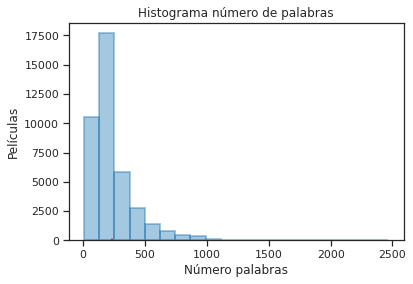

In [8]:
X_train, X_test, vocab_size, real_maxlen = f.tokenize(X_train, X_test, maxlen=maxlen)

# Original

In [17]:
model = f.my_model(maxlen=maxlen, embedding_dim=embedding_dim, vocab_size=vocab_size, lr=lr, epochs=epochs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 512, 64)           7316608   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 512, 32)           6176      
_________________________________________________________________
batch_normalization_5 (Batch (None, 512, 32)           128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 256, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 256, 32)           3104      
_________________________________________________________________
batch_normalization_6 (Batch (None, 256, 32)           128 

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=8,
                    callbacks=[callback])

Epoch 1/10
5000/5000 [==============================] - 392s 78ms/step - loss: 0.7647 - accuracy: 0.5314 - val_loss: 0.4804 - val_accuracy: 0.7669
Epoch 2/10
5000/5000 [==============================] - 383s 77ms/step - loss: 0.4456 - accuracy: 0.8181 - val_loss: 0.3026 - val_accuracy: 0.8798
Epoch 3/10
5000/5000 [==============================] - 381s 76ms/step - loss: 0.3474 - accuracy: 0.8694 - val_loss: 0.2575 - val_accuracy: 0.9006
Epoch 4/10
5000/5000 [==============================] - 383s 77ms/step - loss: 0.2905 - accuracy: 0.9024 - val_loss: 0.2676 - val_accuracy: 0.8946
Epoch 5/10
5000/5000 [==============================] - 382s 76ms/step - loss: 0.2479 - accuracy: 0.9265 - val_loss: 0.3030 - val_accuracy: 0.9013
Epoch 6/10
5000/5000 [==============================] - 383s 77ms/step - loss: 0.2194 - accuracy: 0.9419 - val_loss: 0.3171 - val_accuracy: 0.9000


In [13]:
def plot_history(history, horizontal=0.35, vertical_train=0.05, vertical_val=0.06):
  fit_history = pd.DataFrame(history.history)
  fit_history['epoch'] = fit_history.index + 1
  fit_history = fit_history.round(2)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4.25))

  # Loss
  fit_history.plot(x='epoch', y=['loss', 'val_loss'], kind='line', ylabel='loss', title='Loss', marker='.', ax=ax1)

  # Acc
  fit_history.plot(x='epoch', y=['accuracy', 'val_accuracy'], kind='line', ylabel='acc', title='Accuracy', marker='.', ax=ax2)

  x = fit_history[fit_history['val_accuracy']==fit_history['val_accuracy'].max()]

  first_max_acc = fit_history[fit_history['val_accuracy']==fit_history['val_accuracy'].max()].iloc[0]
  x = first_max_acc['epoch']
  y = first_max_acc['val_accuracy']
  z = first_max_acc['accuracy']

  ax2.text(x = x - horizontal, # x-coordinate position of data label
          y = y - vertical_val, # y-coordinate position of data label
          s = '{:.2f}'.format(y), # data label
          color = 'tab:orange') # set colour of line
  ax2.text(x = x- horizontal, # x-coordinate position of data label
          y = z - vertical_train, # y-coordinate position of data label
          s = '{:.2f}'.format(z), # data label
          color = 'tab:blue') # set colour of line

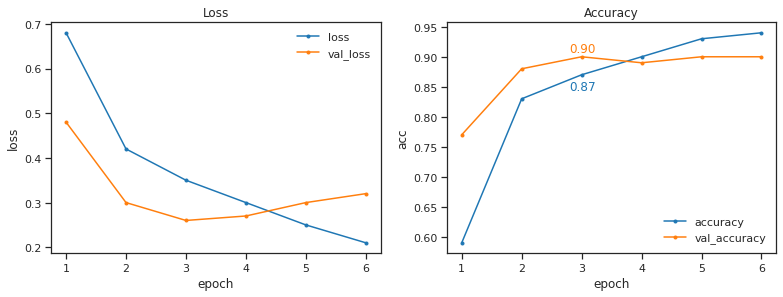

In [34]:
plot_history(history, 
             horizontal=0.2, 
             vertical_train=0.025, vertical_val=-0.008)
# epoch 3

In [35]:
f.plot_metrics(model, X_test, y_test)

Acc: 0.9
Precision: 0.92
Recall: 0.88
F1: 0.9
Conf. Matrix: 
[[4606  394]
 [ 600 4400]]


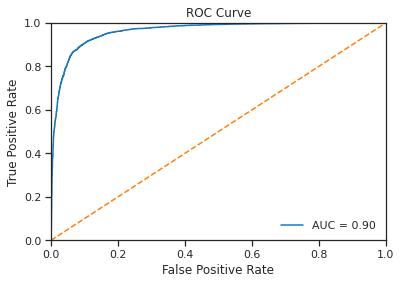

AUC: 0.9006


In [36]:
f.get_roc_curve(model, X_test, y_test)

#CNN -> Resnet


In [9]:
inputs = layers.Input(shape=(maxlen,))

# Embedding
x_inp = layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim)(inputs)

# CNN - Plain
x = layers.Conv1D(32, 3, padding="same", activation="relu", strides=1)(x_inp)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size=2, strides=2)(x)

# CNN - Res 1
x_1 = layers.Conv1D(32, 3, padding="same", activation="relu", strides=1)(x)
x_1 = layers.BatchNormalization()(x_1)
x_1 = layers.Conv1D(32, 3, padding="same", strides=1)(x_1)
x_1 = layers.BatchNormalization()(x_1)
x_1 = layers.Add()([x, x_1])
x_1 = layers.Activation(activations.relu)(x_1)

# CNN - Res 2
x_2 = layers.Conv1D(32, 3, padding="same", activation="relu", strides=1)(x_1)
x_2 = layers.BatchNormalization()(x_2)
x_2 = layers.Conv1D(32, 3, padding="same", strides=1)(x_2)
x_2 = layers.BatchNormalization()(x_2)
x_2 = layers.Add()([x_1, x_2])
x_2 = layers.Activation(activations.relu)(x_2)

x_2 = layers.MaxPooling1D(pool_size=2, strides=2)(x_2)

# LSTM Bi
x = layers.Bidirectional(layers.LSTM(16))(x_2)
x = layers.BatchNormalization()(x)

# FNN
x = layers.Dense(16, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(8, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer, 1 neuron with sigmoid:
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = tf.keras.Model(inputs, predictions)
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr, decay = lr/epochs), metrics=['accuracy'])

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 512, 64)      7316608     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 512, 32)      6176        embedding[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 32)      128         conv1d[0][0]                     
______________________________________________________________________________________________

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=8,
                    callbacks=[callback])

Epoch 1/10
5000/5000 [==============================] - 450s 83ms/step - loss: 0.8047 - accuracy: 0.5092 - val_loss: 0.5809 - val_accuracy: 0.7059
Epoch 2/10
5000/5000 [==============================] - 413s 83ms/step - loss: 0.4775 - accuracy: 0.7958 - val_loss: 0.3499 - val_accuracy: 0.8473
Epoch 3/10
5000/5000 [==============================] - 403s 81ms/step - loss: 0.3510 - accuracy: 0.8683 - val_loss: 0.3135 - val_accuracy: 0.8772
Epoch 4/10
5000/5000 [==============================] - 391s 78ms/step - loss: 0.2946 - accuracy: 0.8999 - val_loss: 0.2455 - val_accuracy: 0.9052
Epoch 5/10
5000/5000 [==============================] - 385s 77ms/step - loss: 0.2328 - accuracy: 0.9297 - val_loss: 0.3786 - val_accuracy: 0.8766
Epoch 6/10
5000/5000 [==============================] - 390s 78ms/step - loss: 0.1747 - accuracy: 0.9561 - val_loss: 0.3022 - val_accuracy: 0.9026
Epoch 7/10
5000/5000 [==============================] - 391s 78ms/step - loss: 0.1301 - accuracy: 0.9688 - val_loss: 0

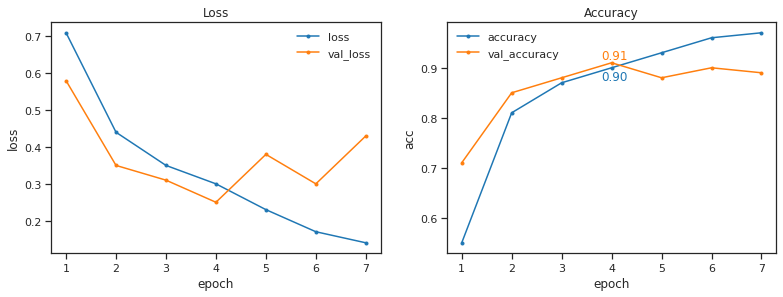

In [14]:
plot_history(history, 
             horizontal=0.2, 
             vertical_train=0.025, vertical_val=-0.008)
# epoch 3

In [15]:
f.plot_metrics(model, X_test, y_test)

Acc: 0.91
Precision: 0.91
Recall: 0.91
F1: 0.91
Conf. Matrix: 
[[4525  475]
 [ 473 4527]]


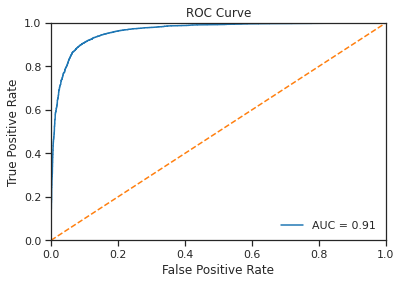

AUC: 0.9052


In [16]:
f.get_roc_curve(model, X_test, y_test)

#Bidirectional LSTM -> Bidirectional GRU

In [17]:
inputs = layers.Input(shape=(maxlen,))

# Embedding
x = layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim)(inputs)

# CNN 1
x = layers.Conv1D(32, 3, padding="same", activation="relu", strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size=2, strides=2)(x)

# CNN 2
x = layers.Conv1D(32, 3, padding="same", activation="relu", strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size=2, strides=2)(x)

# GRU Bi
x = layers.Bidirectional(layers.GRU(16))(x)
x = layers.BatchNormalization()(x)

# FNN
x = layers.Dense(16, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(8, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer, 1 neuron with sigmoid:
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = tf.keras.Model(inputs, predictions)
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr, decay = lr/epochs), metrics=['accuracy'])

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=8,
                    callbacks=[callback])

Epoch 1/10
5000/5000 [==============================] - 383s 76ms/step - loss: 0.7813 - accuracy: 0.5199 - val_loss: 0.5927 - val_accuracy: 0.6541
Epoch 2/10
5000/5000 [==============================] - 375s 75ms/step - loss: 0.4610 - accuracy: 0.8061 - val_loss: 0.3116 - val_accuracy: 0.8760
Epoch 3/10
5000/5000 [==============================] - 364s 73ms/step - loss: 0.3364 - accuracy: 0.8733 - val_loss: 0.2661 - val_accuracy: 0.8936
Epoch 4/10
5000/5000 [==============================] - 364s 73ms/step - loss: 0.2644 - accuracy: 0.9134 - val_loss: 0.2627 - val_accuracy: 0.8921
Epoch 5/10
5000/5000 [==============================] - 377s 75ms/step - loss: 0.1928 - accuracy: 0.9471 - val_loss: 0.3099 - val_accuracy: 0.8954
Epoch 6/10
5000/5000 [==============================] - 377s 75ms/step - loss: 0.1432 - accuracy: 0.9643 - val_loss: 0.3008 - val_accuracy: 0.8963
Epoch 7/10
5000/5000 [==============================] - 380s 76ms/step - loss: 0.1216 - accuracy: 0.9727 - val_loss: 0

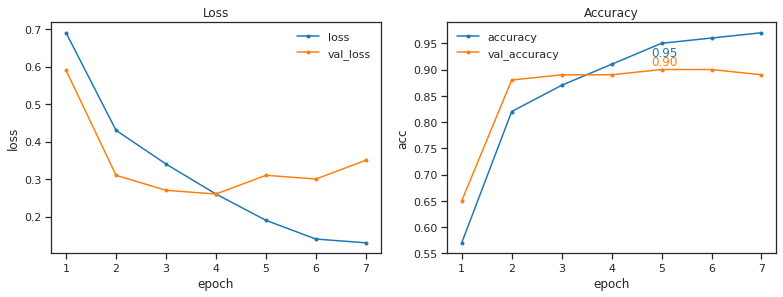

In [19]:
plot_history(history, 
             horizontal=0.2, 
             vertical_train=0.025, vertical_val=-0.008)
# epoch 3

In [20]:
f.plot_metrics(model, X_test, y_test)

Acc: 0.89
Precision: 0.93
Recall: 0.85
F1: 0.89
Conf. Matrix: 
[[4671  329]
 [ 750 4250]]


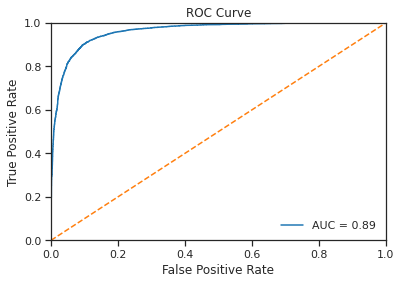

AUC: 0.8921


In [21]:
f.get_roc_curve(model, X_test, y_test)

# Bidirectional GRU -> GRU + GRU

In [22]:
inputs = layers.Input(shape=(maxlen,))

# Embedding
x = layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim)(inputs)

# CNN 1
x = layers.Conv1D(32, 3, padding="same", activation="relu", strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size=2, strides=2)(x)

# CNN 2
x = layers.Conv1D(32, 3, padding="same", activation="relu", strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size=2, strides=2)(x)

# GRU + GRU
x = layers.GRU(16, return_sequences=True)(x)
x = layers.GRU(16)(x)
x = layers.BatchNormalization()(x)

# FNN
x = layers.Dense(16, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(8, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer, 1 neuron with sigmoid:
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = tf.keras.Model(inputs, predictions)
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr, decay = lr/epochs), metrics=['accuracy'])

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=8,
                    callbacks=[callback])

Epoch 1/10
5000/5000 [==============================] - 389s 77ms/step - loss: 0.7391 - accuracy: 0.5488 - val_loss: 0.3622 - val_accuracy: 0.8561
Epoch 2/10
5000/5000 [==============================] - 382s 76ms/step - loss: 0.4066 - accuracy: 0.8315 - val_loss: 0.2834 - val_accuracy: 0.8882
Epoch 3/10
5000/5000 [==============================] - 380s 76ms/step - loss: 0.3260 - accuracy: 0.8808 - val_loss: 0.2578 - val_accuracy: 0.8983
Epoch 4/10
5000/5000 [==============================] - 376s 75ms/step - loss: 0.2742 - accuracy: 0.9129 - val_loss: 0.3148 - val_accuracy: 0.8835
Epoch 5/10
5000/5000 [==============================] - 376s 75ms/step - loss: 0.2286 - accuracy: 0.9358 - val_loss: 0.3003 - val_accuracy: 0.9016
Epoch 6/10
5000/5000 [==============================] - 374s 75ms/step - loss: 0.1978 - accuracy: 0.9507 - val_loss: 0.3356 - val_accuracy: 0.8929
Epoch 7/10
5000/5000 [==============================] - 375s 75ms/step - loss: 0.1602 - accuracy: 0.9606 - val_loss: 0

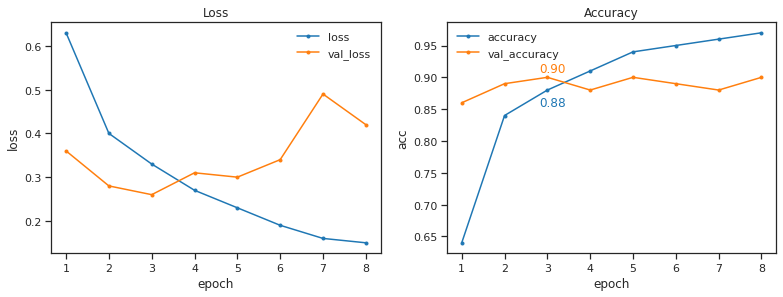

In [24]:
plot_history(history, 
             horizontal=0.2, 
             vertical_train=0.025, vertical_val=-0.008)
# epoch 3

In [25]:
f.plot_metrics(model, X_test, y_test)

Acc: 0.9
Precision: 0.88
Recall: 0.92
F1: 0.9
Conf. Matrix: 
[[4393  607]
 [ 377 4623]]


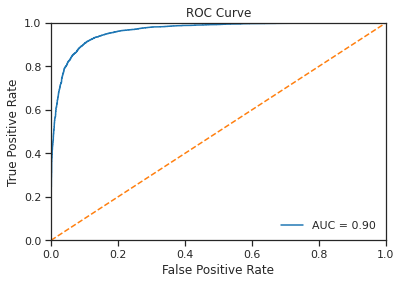

AUC: 0.9016


In [26]:
f.get_roc_curve(model, X_test, y_test)